In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Some Functions I will Need 

#nonlinearity 
def phi(x): 
    return np.tanh(x)

#euler step 
def euler(x, J, dt=0.1):
    return x +dt*(-x + J@phi(x))

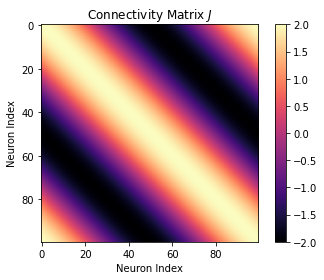

In [146]:
# 4.1 Connectivity Matrix 

#parameters 
N = 100 

#theta vals 
theta_vals = np.arange(0,2*np.pi,2*np.pi/N)

#compute J 
J = np.zeros([100,100])

for i in range(100):
    for j in range(100):
        J[i,j] = 2*np.cos(theta_vals[i]-theta_vals[j])

#viz
plt.imshow(J,cmap='magma')
plt.title("Connectivity Matrix $J$")
plt.xlabel("Neuron Index");plt.ylabel("Neuron Index")
plt.colorbar()
plt.savefig("figures/conec.png",dpi=500)

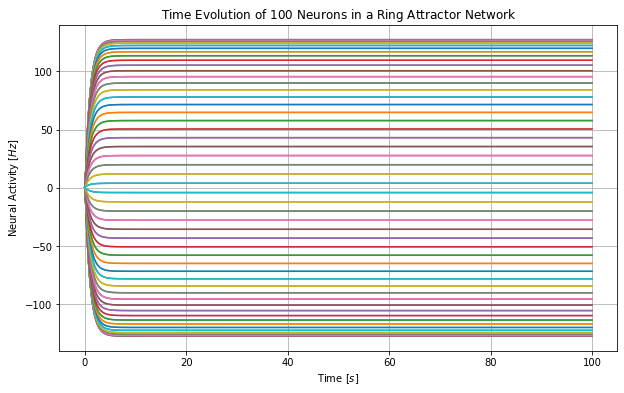

In [147]:
# 4.2 Compute the Dynamics 

# simualtion time 
dt = 0.1; T = 1000
t0 = 0; tf = 100
t_vals = np.linspace(t0,tf,T) 

# initialzie data matrix 
X = np.zeros([N,T])

#time zero 
np.random.seed(0)
x0 = np.random.normal(loc=0,scale=1,size=100) 
x0 = np.concatenate((np.ones(50),np.zeros(50)),axis=0)

# Initial condition for x(t)
X[:,0] = x0

#euler step
for i, t in enumerate(t_vals):
    if i ==0: pass
    
    else:
        X[:,i] = euler(X[:,i-1],J)

#plot dynamics for each neuron 
plt.figure(figsize=(10, 6))
for i in range(100):
    plt.plot(t_vals, X[i,:])
    
plt.grid()
plt.title("Time Evolution of $100$ Neurons in a Ring Attractor Network")
plt.xlabel("Time $[s]$")
plt.ylabel("Neural Activity $[Hz]$")
plt.savefig("figures/ring_sim",dpi=500)

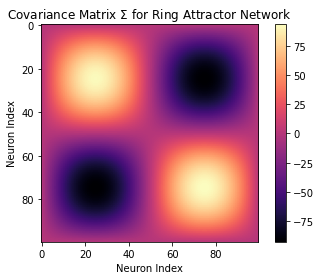

[ 9.99999977e-01+6.81046183e-34j  2.30351986e-08+1.56880345e-41j
  2.57602397e-16+1.75439133e-49j  2.13680243e-16+1.45526118e-49j
 -2.18040637e-16-1.48495747e-49j -1.90381100e-16-1.29658324e-49j
 -1.87609999e-16-1.27771077e-49j -1.74440030e-16-1.18801719e-49j
 -1.44111156e-16-9.81463552e-50j  1.79217445e-16+1.22055360e-49j]


/Users/sashal/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


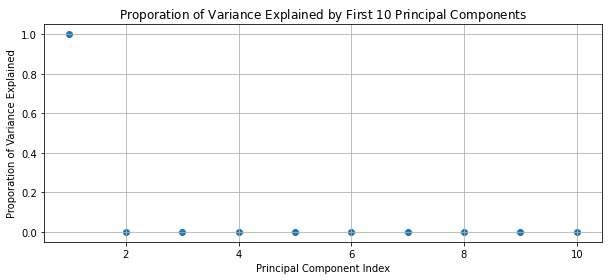

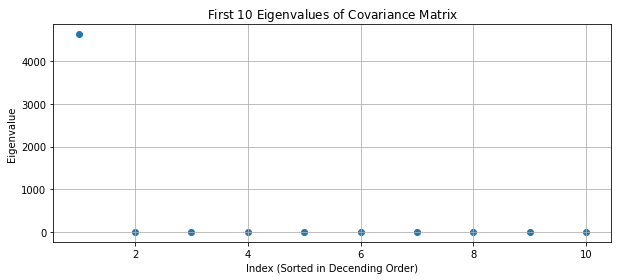

/Users/sashal/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


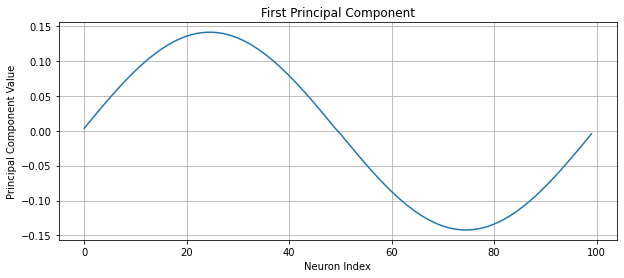

In [164]:
# 4.3 PCA

#step one: collect data -- done 

#step two: center data 
row_means = X.mean(axis =1,keepdims=True)
X_cent = X - row_means

#step three: compute covariance matrix
Sigma = X_cent @ X_cent.T / T
plt.imshow(Sigma, cmap='magma')
plt.title("Covariance Matrix $\Sigma$ for Ring Attractor Network")
plt.xlabel("Neuron Index");plt.ylabel("Neuron Index")
plt.colorbar()
plt.savefig("figures/cov.png",dpi=500)
plt.show()

#step four: compute the e-vals/vects of Sigma
e,v = np.linalg.eig(Sigma)

#compute explained variance 
exp = e / e.sum()

#plot the explained variance
n=10
print(exp[:n])
plt.figure(figsize=(10, 4))
plt.scatter(range(1,n+1), exp[:n])
plt.title(f"Proporation of Variance Explained by First ${n}$ Principal Components")
plt.ylabel("Proporation of Variance Explained")
plt.xlabel("Principal Component Index")
plt.grid()
plt.savefig("figures/explvar.png",dpi=500)
plt.show()

#step five: select principal components 
plt.figure(figsize=(10, 4))
plt.scatter(range(1,n+1), abs(e[:n]))
plt.title(f"First ${n}$ Eigenvalues of Covariance Matrix")
plt.ylabel("Eigenvalue")
plt.xlabel("Index (Sorted in Decending Order)")
plt.savefig("figures/evals.png",dpi=500)
plt.grid();plt.show()


#plot first pc 
pc1 = v[:,0]
pc2 = v[:,1]
plt.figure(figsize=(10, 4))
plt.plot(pc1);plt.grid()
plt.title('First Principal Component')
plt.xlabel('Neuron Index')
plt.ylabel('Principal Component Value')
plt.savefig("figures/firstpc.png",dpi=500)
plt.show()

In [132]:
# 4.4 PCA on a set of attractors 

M = 500 #num simulations

#initialize sim time 
# simualtion time 
dt = 0.1; T = 1000
t0 = 0; tf = 100
t_vals = np.linspace(t0,tf,T) 

#initialize attracor matrix 
Q = np.zeros([N,M])

for j in range(M): 
    
    # initialzie data matrix 
    X = np.zeros([N,T])

    #time zero 
    x0 = np.random.normal(loc=0,scale=1,size=100) 
    
    # Initial condition for x(t)
    X[:,0] = x0

    #euler step
    for i, t in enumerate(t_vals):
        if i ==0: pass
        else:
            X[:,i] = euler(X[:,i-1],J)
    
    Q[:,j] = X[:,-1]

In [86]:
Q.shape

(100, 500)

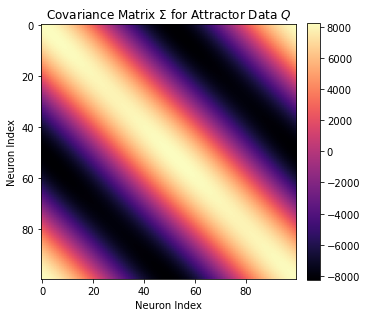

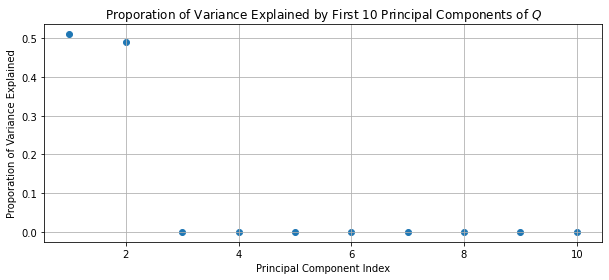

[ 5.10143860e-01-3.18984950e-35j  4.89856140e-01-3.06299357e-35j
 -8.23080544e-17+5.14659347e-51j -8.00908502e-17+5.00795517e-51j
 -7.29485039e-17+4.56135547e-51j  8.07267035e-17-5.04771408e-51j
  7.66178554e-17-4.79079426e-51j -6.42173996e-17+4.01541322e-51j
 -6.02321939e-17+3.76622456e-51j  6.91681238e-17+3.17342836e-19j]


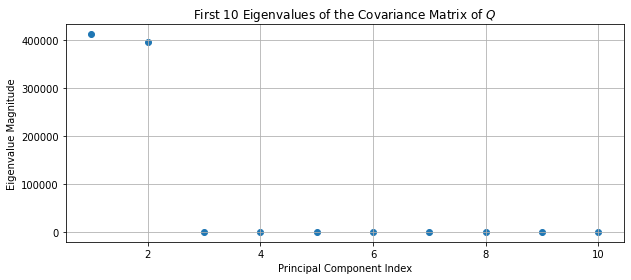

[ 5.10143860e-01-3.18984950e-35j  4.89856140e-01-3.06299357e-35j
 -8.23080544e-17+5.14659347e-51j -8.00908502e-17+5.00795517e-51j
 -7.29485039e-17+4.56135547e-51j  8.07267035e-17-5.04771408e-51j
  7.66178554e-17-4.79079426e-51j -6.42173996e-17+4.01541322e-51j
 -6.02321939e-17+3.76622456e-51j  6.91681238e-17+3.17342836e-19j]


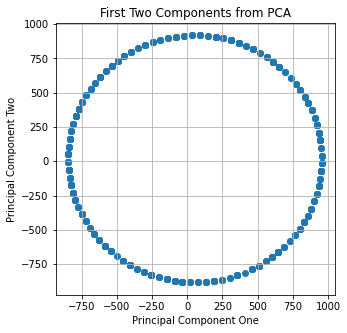

In [160]:
# 4.4 Cont: Perform PCA on Q 
#step one: collect data -- done 

#step two: center data 
Q_cent = np.zeros_like(Q)

for i in range(N): 
    Q_cent[i,:] += Q[i,:]-np.mean(Q[i,:])

#step three: compute covariance matrix
Sigma = Q_cent @ Q_cent.T /M
plt.figure(figsize=(5, 5))
plt.imshow(Sigma, cmap='magma')
plt.title("Covariance Matrix $\Sigma$ for Attractor Data $Q$")
plt.xlabel("Neuron Index");plt.ylabel("Neuron Index")
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig("figures/covattr",dpi=500)
plt.show()

#step four: compute the e-vals/vects of Sigma
e,v = np.linalg.eig(Sigma)

#compute explained variance 
exp = e / e.sum()
plt.figure(figsize=(10, 4))
plt.scatter(range(1,len(exp[:10])+1),exp[:10])
plt.title(f"Proporation of Variance Explained by First ${n}$ Principal Components of $Q$")
plt.ylabel("Proporation of Variance Explained")
plt.xlabel("Principal Component Index")
plt.grid()
plt.savefig("figures/explvarQ.png",dpi=500)
plt.show()
print(exp[:10])


#plt eigenvalues
plt.figure(figsize=(10, 4))
plt.scatter(range(1,len(e[:n])+1),e[:n])
plt.title(f"First ${n}$ Eigenvalues of the Covariance Matrix of $Q$")
plt.ylabel("Eigenvalue Magnitude")
plt.xlabel("Principal Component Index")
plt.grid()
plt.savefig("figures/evalsQ.png",dpi=500)
plt.show()
print(exp[:10])

#first two principal components 
pc1 = v[:,0]; pc2 = v[:,1]
V = np.vstack([pc1,pc2]).T

#project on to first two principal components 
Q_pc1 = Q_cent.T @ pc1
Q_pc2 = Q_cent.T @ pc2

#
vd = np.zeros_like(v) 
vd[:,0]=v[:,0]
vd[:,1]=v[:,2]
Q_pc = np.dot(Q_cent.T,vd)

#method one 
plt.figure(figsize=(5, 5))
plt.scatter(Q_pc1,Q_pc2);plt.grid()
plt.xlabel("Principal Component One");plt.ylabel("Principal Component Two")
plt.title("First Two Components from PCA")
plt.savefig('figures/qpc1',dpi=500)
plt.show()


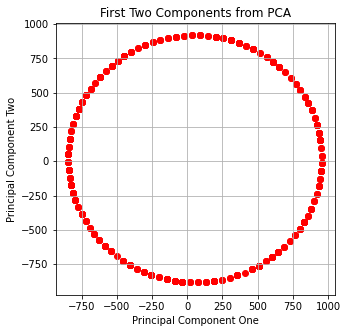

In [156]:
# 4.5 PCA with scikitlearn 
from sklearn.decomposition import PCA

#perform pca 
pca = PCA(n_components=2)
pca.fit_transform(Q.T)
comps = pca.components_
Q_proj = pca.transform(Q.T)


#method one 
plt.figure(figsize=(5, 5))
plt.scatter(Q_proj[:,0],Q_proj[:,1],color='r');plt.grid()
plt.xlabel("Principal Component One");plt.ylabel("Principal Component Two")
plt.title("First Two Components from PCA")
plt.savefig('figures/qpc2',dpi=500)
plt.show()